# Administrating Portal and Server

## Managing Online and Portal


<img src="./img/portal.png" width=50%/>

- ArcGIS Online (AGOL)
- Portal for ArcGIS

### Administration Overview

<img src="./img/gis.admin.png"/>

### Portal vs AGOL

<h3>Organizational differences</h3>

<table border="1" class="dataframe"><thead><tr style="text-align: right;"><th>Function</th><th>ArcGIS Online</th><th>ArcGIS Enterprise</th></tr></thead><tbody><tr><td>collaborations</td><td>X</td><td>X</td></tr><tr><td>credits</td><td>X</td><td></td></tr><tr><td>federation</td><td></td><td>X</td></tr><tr><td>license</td><td>X</td><td>X</td></tr><tr><td>logs</td><td></td><td>X</td></tr><tr><td>machines</td><td></td><td>X</td></tr><tr><td>metadata</td><td>X</td><td>X</td></tr><tr><td>password_policy</td><td>X</td><td>X</td></tr><tr><td>security</td><td></td><td>X</td></tr><tr><td>server</td><td></td><td>X</td></tr><tr><td>site</td><td></td><td>X</td></tr><tr><td>system</td><td></td><td>X</td></tr><tr><td>ux</td><td>X</td><td>X</td></tr></tbody></table>

Most properties on ArcGIS Online are available on ArcGIS Enterprise except 'credit reporting' because ArcGIS Enterprise does not consume credits.

<blockquote><b>Note:</b> You need to log in using a named user account with administrator privileges. When you login, the API detects if you are an organizational administrator, then, the <b>GIS</b> object will ensure you gain access to the <b>admin</b> module.</blockquote>


In [4]:
from arcgis.gis import GIS
gis_agol = GIS(profile="adminProfile")

### Licensing 

- Supports assigning licenses for Esri premium apps
- The licenses include: 
    + ArcGIS Pro, Navigator for ArcGIS, AppStudio for ArcGIS Standard, Drone2Map for ArcGIS, ArcGIS Business Analyst web app, ArcGIS Community Analyst, GeoPlanner for ArcGIS


**Listing Licenses**

In [5]:
license = gis_agol.admin.license
license.all()

[<ArcGIS Insights License at https://esri-training.maps.arcgis.com/sharing/rest/>,
 <ArcGIS Pro License at https://esri-training.maps.arcgis.com/sharing/rest/>,
 <ArcGIS Drone2Map License at https://esri-training.maps.arcgis.com/sharing/rest/>,
 <ArcGIS Image for ArcGIS Online License at https://esri-training.maps.arcgis.com/sharing/rest/>,
 <ArcGIS GeoBIM License at https://esri-training.maps.arcgis.com/sharing/rest/>,
 <ArcGIS for Power BI License at https://esri-training.maps.arcgis.com/sharing/rest/>,
 <ArcGIS GeoPlanner License at https://esri-training.maps.arcgis.com/sharing/rest/>,
 <License at https://esri-training.maps.arcgis.com/sharing/rest/>,
 <ArcGIS AppStudio License at https://esri-training.maps.arcgis.com/sharing/rest/>,
 <ArcGIS Drone2Map License at https://esri-training.maps.arcgis.com/sharing/rest/>,
 <ArcGIS Community Analyst License at https://esri-training.maps.arcgis.com/sharing/rest/>,
 <Runtime Analysis  License at https://esri-training.maps.arcgis.com/sharing/

**Getting a Single License**

In [6]:
pro_license = license.get('ArcGIS Pro')
pro_license

<ArcGIS Pro License at https://esri-training.maps.arcgis.com/sharing/rest/>

**Viewing Licensing Reports**

- provides both visual and tabular reports

**Tabular Reports**

In [9]:
report = pro_license.report
report

,Entitlement,Total,Assigned,Remaining,Users
0,3DAnalystN,500,307,193,"[{'user': 'adr4training', 'lastUsed': 'July 16..."
1,airportsN,500,11,489,"[{'user': 'alra4training', 'lastUsed': 'Novemb..."
2,aviationN,500,8,492,"[{'user': 'alra4training', 'lastUsed': 'Novemb..."
3,bathymetryN,500,41,459,"[{'user': 'alra4training', 'lastUsed': 'Novemb..."
4,businessStdN,500,31,469,"[{'user': 'alra4training', 'lastUsed': 'Novemb..."
5,dataInteropN,500,93,407,"[{'user': 'alra4training', 'lastUsed': 'Novemb..."
6,dataReviewerN,500,32,468,"[{'user': 'alra4training', 'lastUsed': 'Novemb..."
7,defenseN,500,28,472,"[{'user': 'alra4training', 'lastUsed': 'Novemb..."
8,desktopAdvN,500,230,270,"[{'user': 'adr4training', 'lastUsed': 'July 16..."
9,desktopBasicN,500,28,472,"[{'user': 'adr_stud01', 'lastUsed': None}, {'u..."


**Revoking Entitlements**

- `revoke` removes a license for the product assigned to a user.

In [12]:
pro_license..revoke(username="entitleduser", entitlements="*")

True

In [20]:

report[report['Entitlement'] == 'desktopStdN']


,Entitlement,Total,Assigned,Remaining,Users
10,desktopStdN,500,2,498,"[{'user': 'cede4training', 'lastUsed': 'August..."


#### Releasing ArcGIS Pro License for Offline Users

- Users can check out licenses, but it holds a license from anyone else to use
- Administrators can force the release of that license on enterprise

```python
licenses.release_license('username')
{'status' : 'success'}
```

### Credit Management

- The currency of ArcGIS Online
- Allows users to do analysis, enrich data, and much more
- Hosting services cost credit as well.

**Access the CreditManager**

In [21]:
cm = gis_agol.admin.credits
cm

**View Available Credits**

- Get the total number of credits on an Organization

In [22]:
cm.credits

3367.9314

**Managing Credits**

- Setup budgeting rules by enabling management

In [23]:
if cm.is_enabled:
    #print(cm.enable())
cm.is_enabled

True


True

**Checking the Default Limit**

- The default credit setting is unlimited (-1)


In [24]:
cm.default_limit

500

**Demo: Setting the default user credits**

In [25]:
# %load ./solutions/setting_credits.py
if cm.default_limit == -1:
    cm.default_limit = 500
cm.default_limit

500

**Allocating Credits to a User**

- Assignment of credits beyond the default is sometimes necessary

In [30]:
cm.allocate(username=gis_agol.users.me.username, 
            credits=300)

True

**Give Specific User Unlimited Credits**

In [31]:
#cm.allocate(username=gis_agol.users.me.username,credits=-1)

True

**Disabling Credit Management**

- `disable()` on credit manager will disable any credit monitoring
- **THIS IS A BAD IDEA**

### Metadata Management

- Information about information
- Allows users to provide robust information about datasets beyond the description, title, tags, etc...

### User History

- Examine what users are doing with the organization
- Ensure specific content does not change or get modified


<AxesSubplot:>

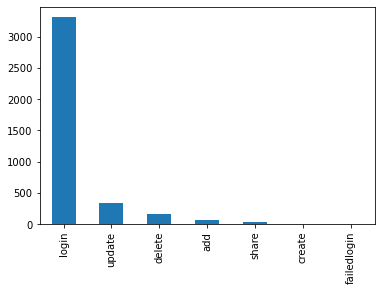

In [26]:
%matplotlib inline
import datetime
import pandas as pd
then = datetime.datetime.now() - datetime.timedelta(days=4)
df = pd.read_csv(gis_agol.admin.history(start_date=then, num=100000))
df.action.value_counts().plot.bar()

### Portal Logs

- A record of events that occurred
- Used for monitoring and troubleshooting portal

#### Examples of Logs Incidents:

+ Installation and upgrade events, such as authorizing the software and creating the portal website
+ Publishing of services and items, such as hosted services, web maps, and data items
+ Content management events, such as sharing items, changing item ownership, and adding, updating, moving, and deleting items
+ Security events, such as users logging in to the portal, creating, deleting, and disabling users, creating and changing user roles, updating HTTP and HTTPS settings, import and export of security certificates, and updating the portal's identity store
+ Organization management events, such as adding and configuring groups, adding or removing users from a group, configuration of the gallery, basemaps, utility services, and federated servers, and configuring log settings and deleting logs
+ General events, such as updating the portal's search index and restarting the portal

In [29]:
gis = GIS(profile="enterpriseAdmin")
logs = gis.admin.logs
logs

<Logs at https://sit.lutry.ch/portal//portaladmin/logs>

#### Log Settings

- Modify, update basic storage and save setting

In [30]:
logs.settings

{'logDir': 'D:\\arcgisportal\\logs\\',
 'logLevel': 'VERBOSE',
 'maxErrorReportsCount': 10,
 'maxLogFileAge': 90,
 'usageMeteringEnabled': False}

#### Query Portal Logs

In [31]:
import datetime
import pandas as pd
results = logs.query(start_time=datetime.datetime.now() - datetime.timedelta(days=10))

<AxesSubplot:>

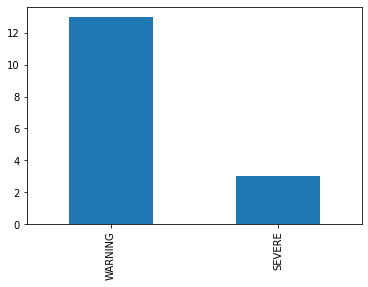

In [32]:
%matplotlib inline
df = pd.DataFrame(results['logMessages'])
df.type.value_counts().plot.bar()

In [33]:
df.head()

,type,message,time,source,machine,user,code,elapsed,process,thread,methodName,requestID
0,WARNING,Sign in error: Invalid username or password s...,1668196000660,Sharing,VM-GIS-WEB.LUTRY.LAN,,219999,,484,1,,
1,WARNING,Sign in error: Invalid username or password s...,1668195998399,Sharing,VM-GIS-WEB.LUTRY.LAN,,219999,,484,1,,
2,WARNING,The web server was found to be stopped. Re-sta...,1668109119809,Portal,VM-GIS-WEB.LUTRY.LAN,,217064,,2484,1,,
3,WARNING,The database server was found to be stopped. R...,1668109104185,Portal,VM-GIS-WEB.LUTRY.LAN,,217060,,2484,1,,
4,WARNING,Started Index Service.,1668109103701,Portal,VM-GIS-WEB.LUTRY.LAN,,218015,,2484,1,,


### Deep Dive into PortalAdmin API

####  Inspecting the Portal's Machines

- query the machines that power your portal



In [34]:
machines = gis.admin.machines
machines

<Machines at https://sit.lutry.ch/portal//portaladmin/machines>

In [35]:
machines.list()

[<Machine at https://sit.lutry.ch/portal//portaladmin/machines>]

**Check if Machine is Running**

In [36]:
machine = machines.list()[0]
machine.status()

True

#### System Directories

- inspect the physical pathes where resources are stored

In [37]:
directories = gis.admin.system.directories
directories

[<Directory at https://sit.lutry.ch/portal//portaladmin/system/directories/index>,
 <Directory at https://sit.lutry.ch/portal//portaladmin/system/directories/db>,
 <Directory at https://sit.lutry.ch/portal//portaladmin/system/directories/temp>,
 <Directory at https://sit.lutry.ch/portal//portaladmin/system/directories/content>]

In [38]:
d = directories[0]
d.properties

{
  "name": "index",
  "physicalPath": "D:\\arcgisportal\\index",
  "directoryType": "INDEX",
  "description": "The index directory."
}

#### The System 

In [39]:
system = gis.admin.system
system

<System at https://sit.lutry.ch/portal//portaladmin/system>

In [40]:
system.properties

{}

#### Re-indexing

- Sometimes artifacts remain after deleting items
- Forcing re-indexing can solved that problem

In [41]:
system.index_status

{'indexes': [{'name': 'users', 'databaseCount': 85, 'indexCount': 85},
  {'name': 'groups', 'databaseCount': 423, 'indexCount': 423},
  {'name': 'search', 'databaseCount': 17864, 'indexCount': 17864}],
 'syncStatus': True}

In [ ]:
#system.reindex(mode="SEARCH_MODE")

In [ ]:
system.index_status

## Managing ArcGIS Server

### Managing Federated Servers

- The `admin` property provides useful tools to manage ArcGIS Server instances

In [43]:
gis = GIS(profile="enterpriseAdmin")
servers = gis.admin.servers
servers

<ServerManager at https://sit.lutry.ch/portal//portaladmin>

#### Listing the Federated Servers


In [44]:
s = servers.list()
s

[<Server at https://sit.lutry.ch/arcgis/admin>]

#### Check if Servers are Working

- validate ensures everything is federated and running correctly

In [45]:
servers.validate()

True

### Connecting to a Server

#### Accessing Single Server


In [46]:
server = s[0]
server

<Server at https://sit.lutry.ch/arcgis/admin>

In [47]:
server.properties

{
  "isServerLicensed": "true",
  "resources": [
    "machines",
    "clusters",
    "system",
    "services",
    "security",
    "data",
    "uploads",
    "logs",
    "mode",
    "usagereports",
    "webhooks"
  ],
  "currentVersion": 10.81,
  "fullVersion": "10.8.1",
  "acceptLanguage": null
}

#### Accessing Server Logs

- Like the portal Logs, server provide a host of information

In [48]:
logs = server.logs
logs

<LogManager at https://sit.lutry.ch/arcgis/admin/logs>

In [49]:
logs.settings

{'logDir': 'C:\\arcgisserver\\logs\\',
 'logLevel': 'WARNING',
 'maxErrorReportsCount': 10,
 'maxLogFileAge': 90,
 'usageMeteringEnabled': False,
 'statisticsConfig': {'enabled': True,
  'samplingInterval': 30,
  'maxHistory': 0,
  'statisticsDir': 'D:\\arcgisserver\\directories\\arcgissystem'}}

### Managing service folders

**Creating a Folder** 

- use `create_folder`

In [ ]:
#server.services.create_folder("crime_analysis")

**Delete a Folder** 

- use `delete_folder`

In [ ]:
#server.services.delete_folder('crime_analysis')

### Managing Services

- Access service management from `services` property
- Provides the ability start,stop, delete, and modify services

In [56]:
services = server.services
services

<ServiceManager at https://sit.lutry.ch/arcgis/admin/services>

#### Checking if Service Exists

To check if a service exists on your server, call the `exists` method and specify the folder name, service name and type. You can also use this method to verify if a folder exists on the server.

In [57]:
services.exists(folder_name='Hosted', name='Ports', service_type='FeatureServer')

False

#### Demo: Listing all Services

In [58]:
for folder in services.folders:
    for s in services.list(folder):
        print(s)

<Service at https://sit.lutry.ch/arcgis/admin/services/Hosted/Cadastre_Lutry_64000to7_031022.VectorTileServer>
<Service at https://sit.lutry.ch/arcgis/admin/services/Hosted/Jorat_cadastre.VectorTileServer>
<Service at https://sit.lutry.ch/arcgis/admin/services/Hosted/ombrage_mnt_2019.MapServer>
<Service at https://sit.lutry.ch/arcgis/admin/services/Hosted/orthophoto_2020.MapServer>
<Service at https://sit.lutry.ch/arcgis/admin/services/Hosted/Sans_fond_de_carte.MapServer>
<Service at https://sit.lutry.ch/arcgis/admin/services/System/CachingControllers.GPServer>
<Service at https://sit.lutry.ch/arcgis/admin/services/System/CachingTools.GPServer>
<Service at https://sit.lutry.ch/arcgis/admin/services/System/CachingToolsEx.GPServer>
<Service at https://sit.lutry.ch/arcgis/admin/services/System/DistributedWorker.GPServer>
<Service at https://sit.lutry.ch/arcgis/admin/services/System/DynamicMappingHost.MapServer>
<Service at https://sit.lutry.ch/arcgis/admin/services/System/FeatureServiceTo

#### Control a Service's State

- `start`, `stop` and `restart` services

In [59]:
for service in services.list():
    if service.properties.serviceName == 'SampleWorldCities':
        break
service

<Service at https://sit.lutry.ch/arcgis/admin/services/zone_releve_GNSS.MapServer>

**Check the Service Status**

- Shows if the services is running or not

In [60]:
service.status

{'configuredState': 'STARTED', 'realTimeState': 'STARTED'}

In [ ]:
#service.stop()

In [ ]:
service.status

In [ ]:
#service.start()

In [ ]:
service.status

### Modifying a Service

- modify extensions, pooling, etc...

In [ ]:
for service in services.list():
    if service.properties.serviceName == 'SampleWorldCities':
        break
service

In [ ]:
for ext in service.extensions:
    if ext.typeName == "KmlServer":
        ext.enabled = True
[(ext.typeName, ext.enabled) for ext in service.extensions]

### Publishing an SD File

- directly publish SD file to server


In [ ]:
fp = r"./data/dino_AttachmentManager_basic.sd"
services.publish_sd(sd_file=fp)

In [ ]:
s = services.list()[0]
s.properties

In [ ]:
s.delete()

### Server Logs

ArcGIS Server records events that occur, and any errors associated with those events, to logs. Logs are an important tool for monitoring and troubleshooting problems with your site. Information in the logs will help you identify errors and provide context on how to address problems

In [ ]:
logs = server.logs
logs

In [ ]:
logs.settings

#### Filtering and querying server logs

In [ ]:
import datetime
import pandas as pd
now = datetime.datetime.now()
start_time = now - datetime.timedelta(days=10)
start_time

In [ ]:
recent_logs = logs.query(start_time = start_time)

#print a message as a sample
recent_logs['logMessages']

### Monitoring Server Usage

ArcGIS Server records various service statistics, such as total requests, average response time and timeouts. Administrators and publishers can use this information to monitor service activity to better understand how clients are using services. For example, monitoring server statistics help you answer questions such as:

- What is the total number of requests that my ArcGIS Server site handled during the past week?
- How was the service request load distributed during the past month?
- How are my services performing on an hourly basis?
- What was the maximum number of service instances used at any given time for a particular service?

In [61]:
usage = server.usage
usage

<ReportManager at https://sit.lutry.ch/arcgis/admin/usagereports>

#### Using built-in report

In [62]:
reports = usage.list()
reports

[<Report at https://sit.lutry.ch/arcgis/admin/usagereports/1567600628932>,
 <Report at https://sit.lutry.ch/arcgis/admin/usagereports/1569411646180>,
 <Report at https://sit.lutry.ch/arcgis/admin/usagereports/1666691626620>,
 <Report at https://sit.lutry.ch/arcgis/admin/usagereports/1666691709895>,
 <Report at https://sit.lutry.ch/arcgis/admin/usagereports/1666691749135>,
 <Report at https://sit.lutry.ch/arcgis/admin/usagereports/1666698539670>,
 <Report at https://sit.lutry.ch/arcgis/admin/usagereports/1666698585505>,
 <Report at https://sit.lutry.ch/arcgis/admin/usagereports/Total%20requests%20for%20the%20last%207%20days>]

In [63]:
for r in reports:
    print(r.properties['reportname'])

1567600628932
1569411646180
1666691626620
1666691709895
1666691749135
1666698539670
1666698585505
Total requests for the last 7 days


#### Querying maximum response times for the last 7 days

In [64]:
data = reports[0].query()

In [65]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

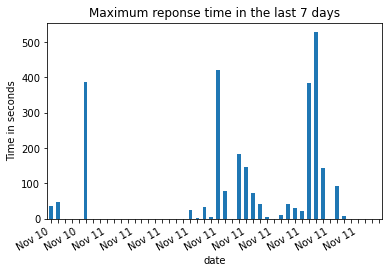

In [66]:
#store reponse times in Y axis
data_y = data['report']['report-data'][0][0]['data']

#convert dates to readable dates and store in X axis
data_x = [pd.to_datetime(datetime.fromtimestamp(d//1000)) \
          for d in data['report']['time-slices']]

df = pd.DataFrame(list(zip(data_x, data_y)), columns=["date", "count"])
q = df['count'].isnull() # change NaN values to 0
df.loc[q, 'count'] = 0
df.index = df['date']
df['count'] = df['count'] 

ax = df['count'].plot(kind='bar', x=df['date'])
ticklabels = ['']*len(df.index)
ticklabels[::4] = [item.strftime('%b %d') for item in df.index[::4]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
ax.set_title('Maximum reponse time in the last 7 days')
ax.set_ylabel('Time in seconds')
plt.gcf().autofmt_xdate()
plt.show()

#### Creating Quick Reports

- On the fly reporting
- Data is not saved

**Metrics Available**

- RequestCount - the number of requests received
- RequestsFailed - the number of requests that failed
- RequestsTimedOut - the number of requests that timed out
- RequestMaxResponseTime - the maximum response time
- RequestAvgResponseTime - the average response time
- ServiceActiveInstances - the maximum number of active (running) service instances sampled at 1 minute intervals, for a specified service


In [67]:
data = usage.quick_report(since="LAST_MONTH", metrics="RequestCount")
data.keys()

dict_keys(['report'])

In [68]:
type(data['report']['report-data']), len(data['report']['time-slices'])

(list, 30)

In [69]:
import pandas as pd
data_flat = {
    #'report_data' : data['report']['report-data'],
    'time_slices' : data['report']['time-slices']
}
for d in data['report']['report-data'][0]:
    data_flat[d['metric-type']] = d['data']

In [70]:
pd.DataFrame(data_flat).tail()

,time_slices,RequestCount
25,1667851200000,3141
26,1667937600000,5157
27,1668024000000,4455
28,1668110400000,2420
29,1668196800000,2706


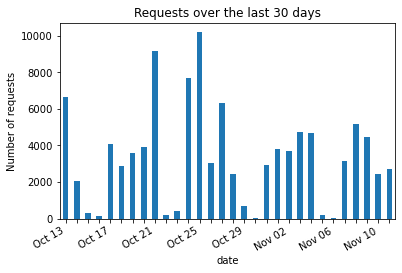

In [73]:
#store reponse times in Y axis
data_y = data_flat["RequestCount"]

#convert dates to readable dates and store in X axis
data_x = [pd.to_datetime(datetime.fromtimestamp(d//1000)) \
          for d in data_flat['time_slices']]

df = pd.DataFrame(list(zip(data_x, data_y)), columns=["date", "count"])
q = df['count'].isnull() # change NaN values to 0
df.loc[q, 'count'] = 0
df.index = df['date']
df['count'] = df['count'] 

ax = df['count'].plot(kind='bar', x=df['date'])
ticklabels = ['']*len(df.index)
ticklabels[::4] = [item.strftime('%b %d') for item in df.index[::4]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
ax.set_title('Requests over the last 30 days')
ax.set_ylabel('Number of requests')
plt.gcf().autofmt_xdate()
plt.show()

## Questions?